## Movie Rating Predictions

### Table of Contents

    1. Project Description
    2. Data Exploration
    3. Feature Engineering
    4. Algorithm Selection
        4.1. K-Nearest Neighbors Classifier
        4.2. Decision Tree Classifier
        4.3. Random Forest Classifier 
    5. Conclusion

### Project Description
The goal of this project is to build a classification algorithm to predict the rating of a movie on Rotten Tomatoes. This rating can be 'Rotten', 'Fresh', or 'Certified-Fresh'.
The dataset that is going to be used is rotten_tomatoes_movies.csv and it can be found on Kaggle.

### Data Exploration

The data exploration begins by reading the data, using Python's pandas library.

In [9]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# read the dataset
df = pd.read_csv('rotten_tomatoes_movies.csv')

In [11]:
# the dataset has 17712 rows and 22 columns
df.shape

(17712, 22)

In [12]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [13]:
# inspect columns type and number of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [14]:
# select numerical features in the dataset
df_numerical = df[['runtime',
 'tomatometer_rating',
 'tomatometer_count',
 'audience_rating',
 'audience_count',
 'tomatometer_top_critics_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count']]

In [15]:
# use describe method to get a view of the numerical features in the dataset
df_numerical.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [16]:
# select the categorical features in the dataset to describe
df_categorical = df[[
 'rotten_tomatoes_link',
 'movie_title',
 'movie_info',
 'critics_consensus',
 'content_rating',
 'genres',
 'directors',
 'authors',
 'actors',
 'original_release_date',
 'streaming_release_date',
'production_company',
'audience_status',
'tomatometer_status']]
df_categorical.describe()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,production_company,audience_status,tomatometer_status
count,17712,17712,17391,9134,17712,17693,17518,16170,17360,16546,17328,17213,17264,17668
unique,17712,17106,17389,9132,6,1106,8933,12989,17330,5804,2271,3046,2,3
top,m/0814255,Hamlet,"Wisecracking mercenary Deadpool meets Russell,...",High Life is as visually arresting as it is ch...,R,Drama,Clint Eastwood,Woody Allen,Werner Herzog,2002-01-01,2016-08-10,Paramount Pictures,Upright,Rotten
freq,1,6,2,2,6377,1887,38,33,4,29,1235,517,9390,7565


### Feature Engineering

We can see that there are only two categorical features that can be taken into account: content_rating and audience_status. The other features have way too many unique values. 
Because content_rating  has 6 unique values we will use one-hot encoding  for this feature.

<Axes: >

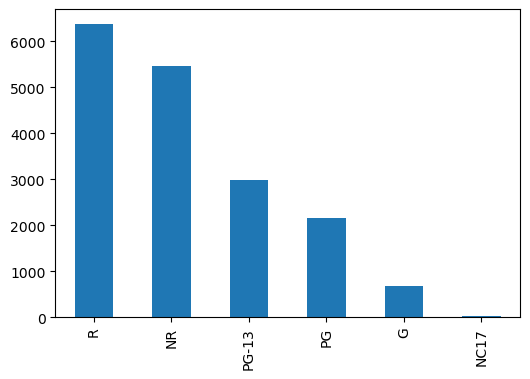

In [17]:
df.content_rating.value_counts().plot(kind = 'bar', figsize = (6, 4))

In [18]:
df_content_rating = pd.get_dummies(df['content_rating'])

For the audience_status feature, we will use ordinal encoding.

<Axes: >

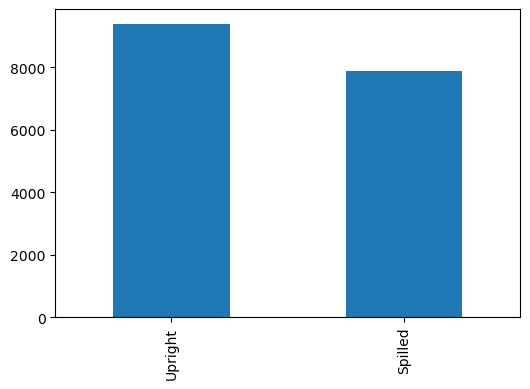

In [19]:
df.audience_status.value_counts().plot(kind = 'bar', figsize = (6, 4))

In [20]:
df_audience_status = df['audience_status'].map({'Spilled': 0, 'Upright': 1})
df_audience_status

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
17707    1.0
17708    1.0
17709    1.0
17710    1.0
17711    1.0
Name: audience_status, Length: 17712, dtype: float64

For our target variable, tomatometer_status, we will also use ordinal encoding.

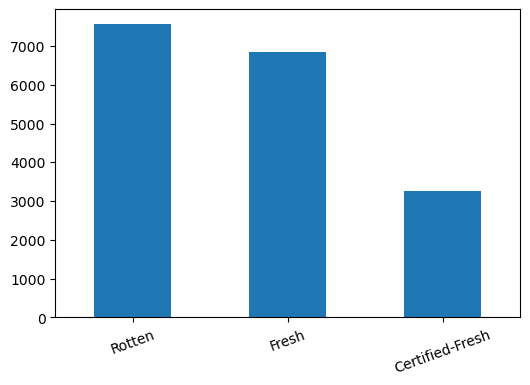

In [21]:
df.tomatometer_status.value_counts().plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation= 20)
plt.show()

In [22]:
df_tomatometer_status = df['tomatometer_status'].map({'Rotten': 0, 'Fresh': 1, 'Certified-Fresh': 2})
df_tomatometer_status

0        0.0
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
17707    0.0
17708    2.0
17709    1.0
17710    1.0
17711    0.0
Name: tomatometer_status, Length: 17712, dtype: float64

We will form the final dataset.

In [23]:
df_final = pd.concat([df_numerical, df_content_rating, df_audience_status, df_tomatometer_status], axis = 1).dropna()
df_final

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,104.0,56.0,9.0,74.0,1195.0,2,5,4,0,0,0,0,0,1,1.0,0.0
17708,108.0,98.0,291.0,92.0,101511.0,50,285,7,0,0,0,1,0,0,1.0,2.0
17709,142.0,80.0,10.0,86.0,7146.0,0,8,2,0,0,1,0,0,0,1.0,1.0
17710,135.0,96.0,23.0,91.0,30193.0,6,22,1,0,0,0,1,0,0,1.0,1.0


For a better understanding of our data, we can check the distribution of the values for our features.

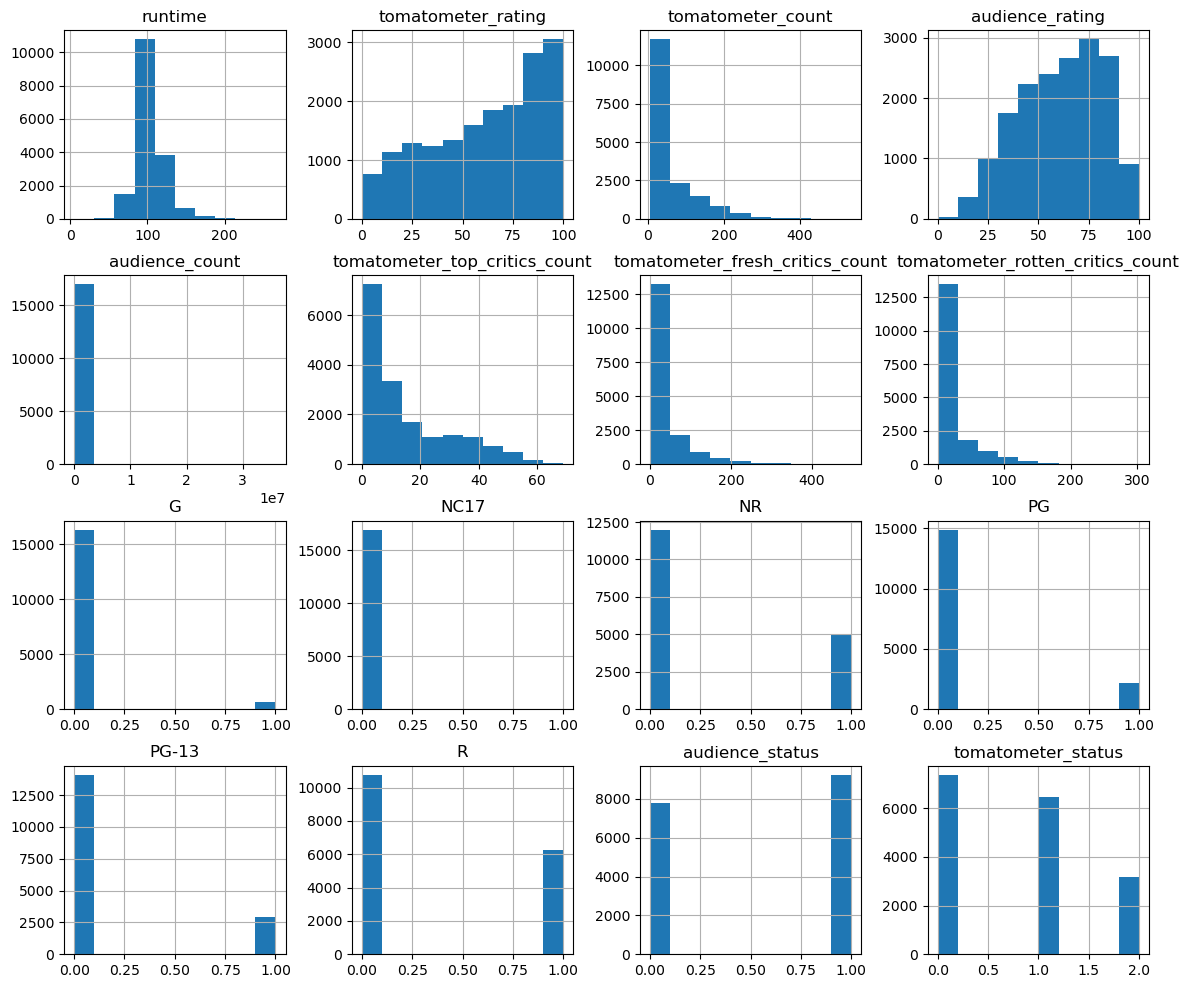

In [24]:
df_final.hist(figsize = (14, 12), bins = 10)
plt.show()

### Algorithm selection

In [25]:
# import  necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
X = df_final.drop(columns = ['tomatometer_status'])
y = df_final['tomatometer_status']

#### K-Nearest Neighbors Classifier

For this model, we will first normalize the data and then we will split the dataset into a train and a test set.

In [27]:
X1 = MinMaxScaler().fit_transform (X)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

In order to find the best value for the number of neighbours (k), we will find and plot the accuracy scores for different k values.

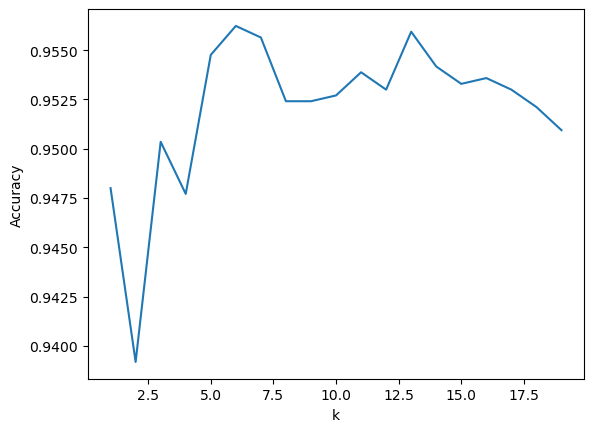

In [28]:
accuracy_scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
k_list = [i for i in range(1, 20)]
plt.plot(k_list, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

We can see that the optimal value for k  is 6. So we will print the classification report and visualize the confusion matrix for k = 6.

In [29]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y1_pred = knn.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average = "weighted")}')
print(classification_report(y_test, y_pred))

accuracy: 0.950940070505288
f1 score: 0.9507335605439046
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1488
         1.0       0.91      0.97      0.94      1286
         2.0       0.95      0.86      0.90       630

    accuracy                           0.95      3404
   macro avg       0.95      0.93      0.94      3404
weighted avg       0.95      0.95      0.95      3404



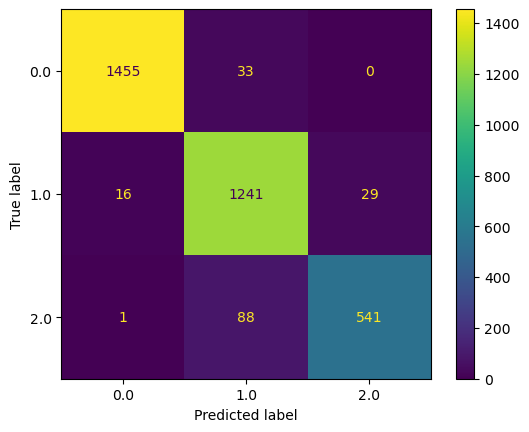

In [30]:
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

#### Decision Tree Classifier
For decision tree and random forest models we will standardize the data and then split it into a train and a test set.

In [31]:
X2 = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)

In [32]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average = "weighted")}')
print(classification_report(y_test, y_pred))

accuracy: 0.9932432432432432
f1 score: 0.9932307188376025
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.99      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



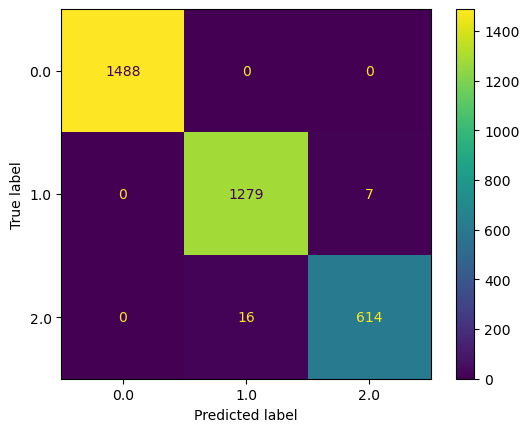

In [33]:
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

We will visualise a decision tree with a maximum depth of 3.

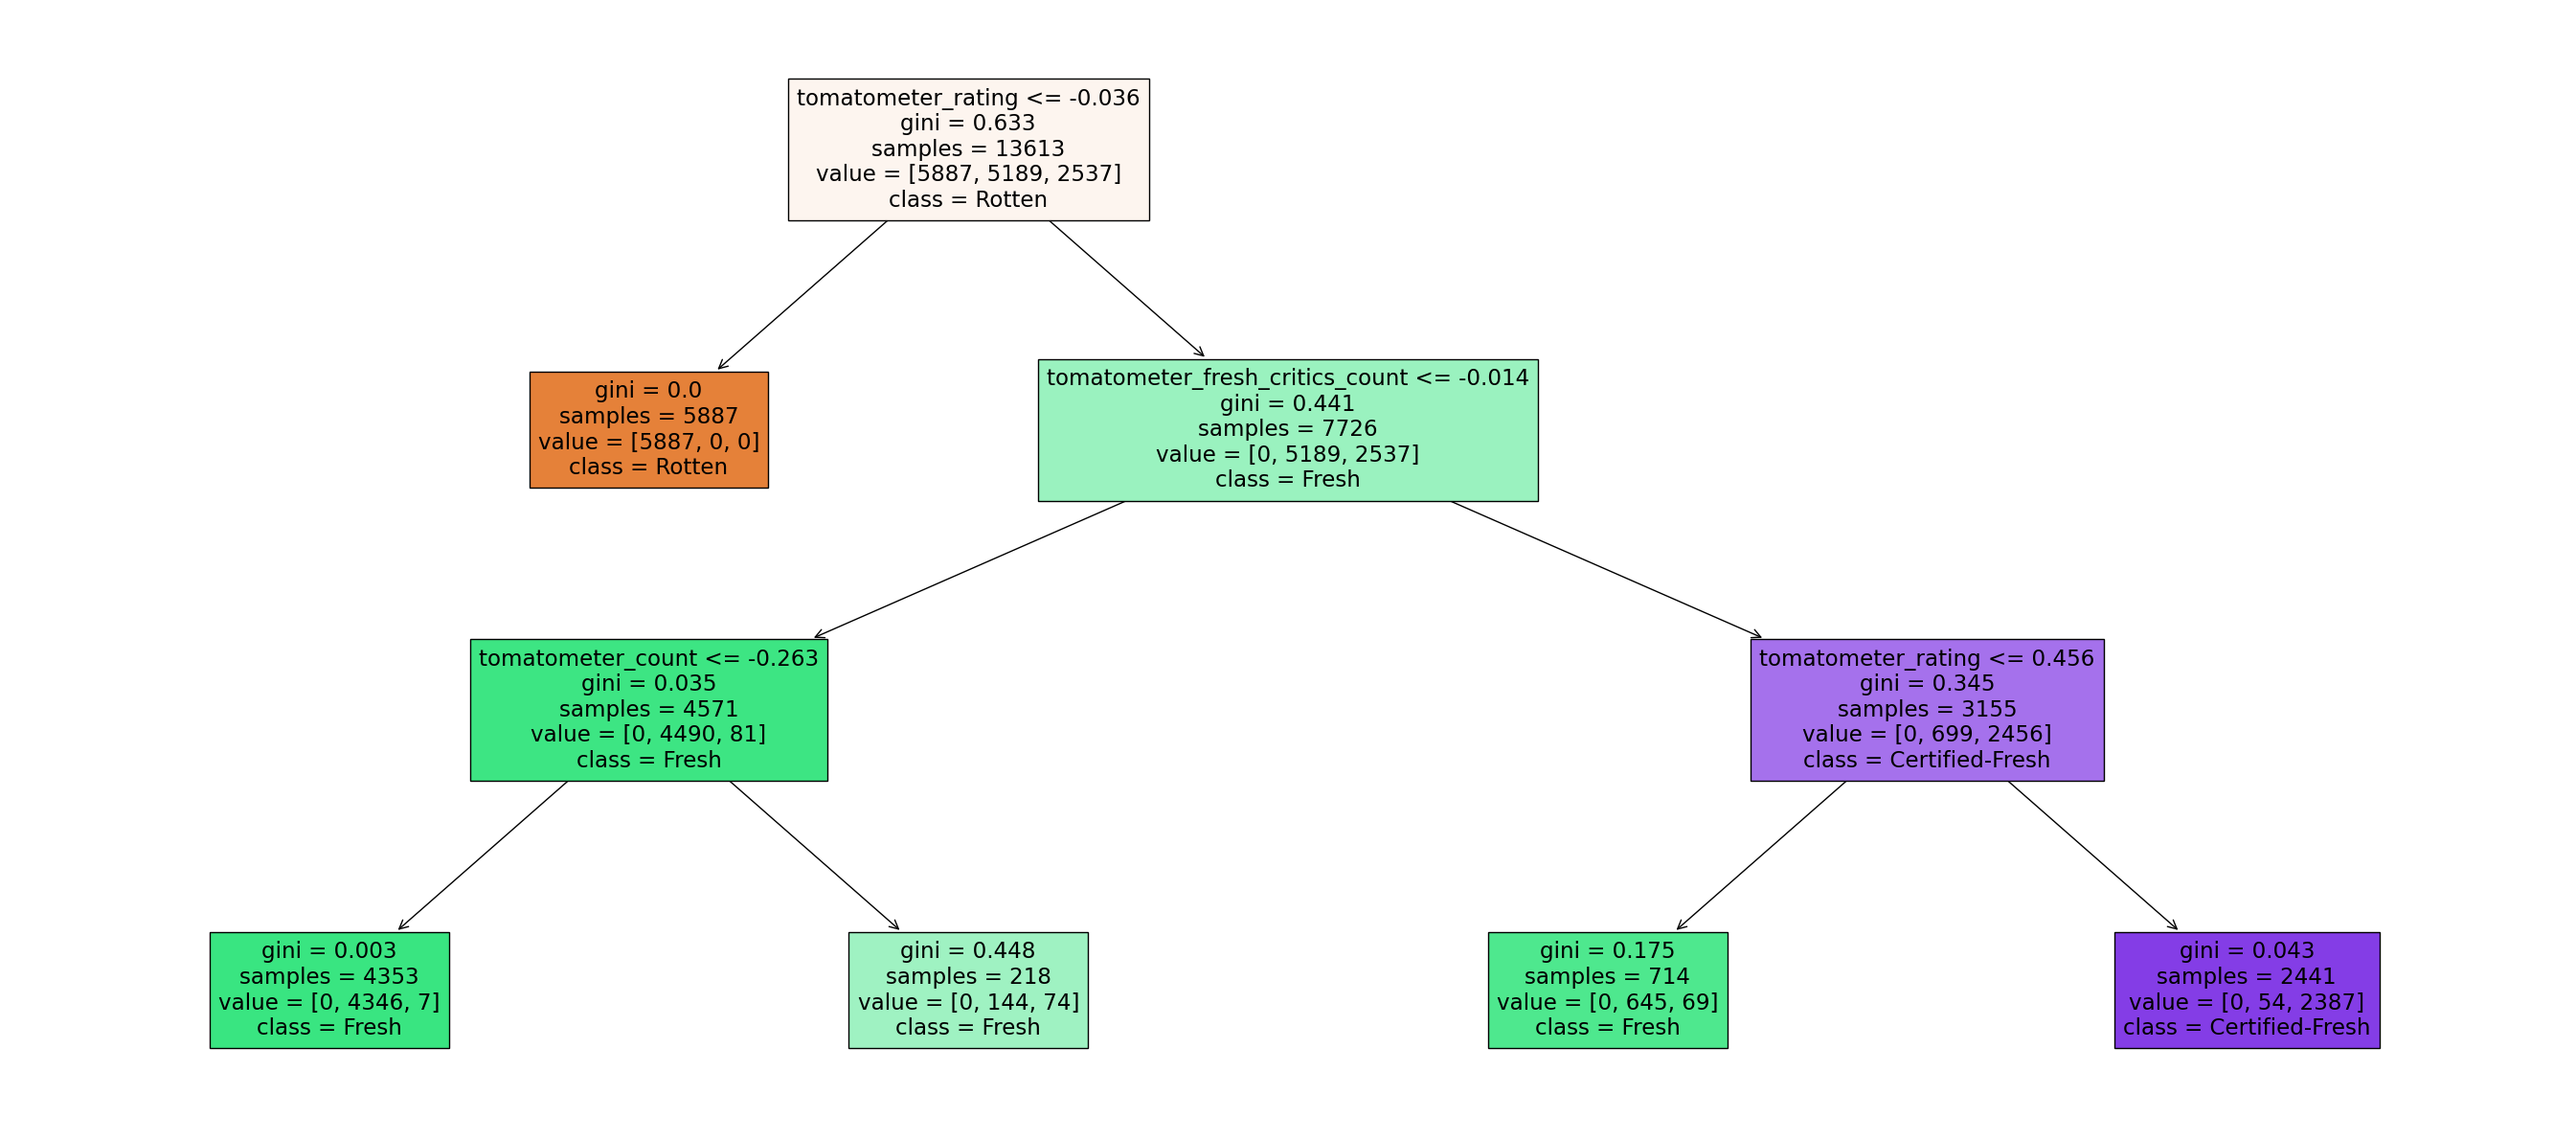

In [34]:
dt_max3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt_max3.fit(X_train, y_train)
plt.figure(figsize = (27,12))
plot_tree(dt_max3, feature_names = X.columns, class_names = ['Rotten', 'Fresh', 'Certified-Fresh'], filled = True)
plt.tight_layout()
plt.show()

#### Random Forest Classifier

First, we will train a random forest classifier with all the features, using the same train and test datasets we used for the decision tree classifier.

In [35]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average = "weighted")}')
print(classification_report(y_test, y_pred))

accuracy: 0.9908930669800236
f1 score: 0.9908799877765033
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



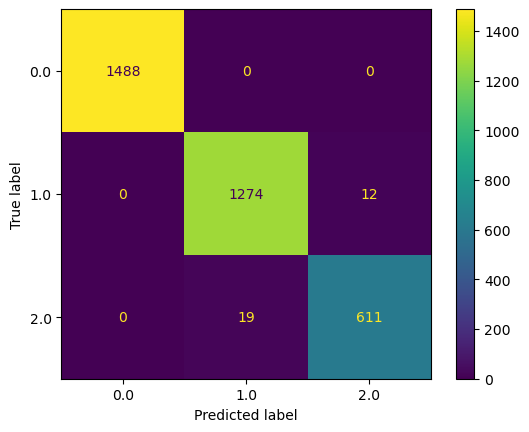

In [36]:
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

Now we are going to get and visualise the importance of each feature and create another model that only keeps the important features.

<BarContainer object of 15 artists>

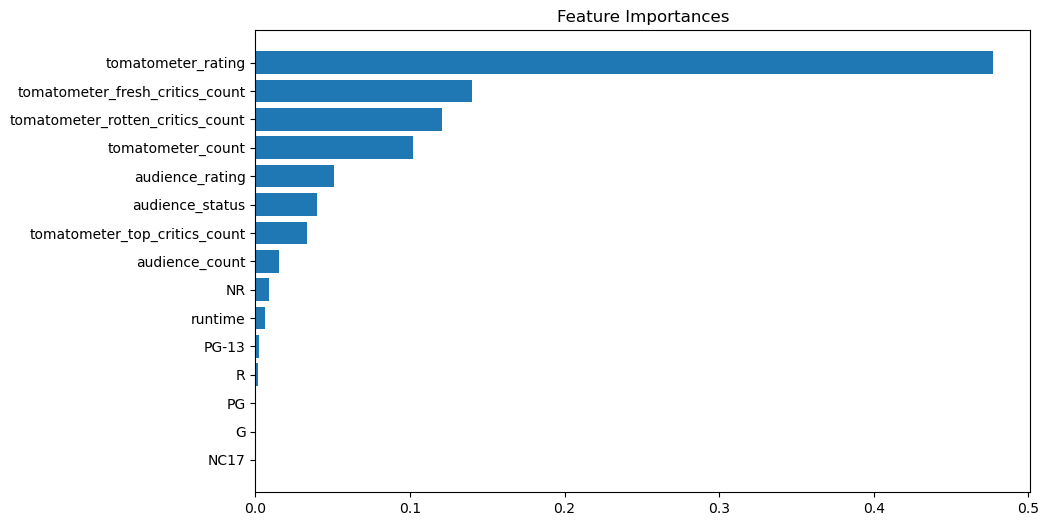

In [37]:
# calculate feature importances
importances = rf.feature_importances_
# sort importances 
indices = np.argsort(importances)
feature_names = [X.columns[i] for i in indices]

plt.figure(figsize = (10, 6))
plt.title('Feature Importances')
plt.barh(feature_names, importances[indices])

In [38]:
# drop the less important features
X = df_final.drop(columns = ['tomatometer_status','audience_count', 'NR', 'runtime', 'PG-13', 'R', 'PG', 'G', 'NC17' ])

In [39]:
X3 = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state= 42)

In [40]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average = "weighted")}')
print(classification_report(y_test, y_pred))

accuracy: 0.9923619271445359
f1 score: 0.9923588229387634
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



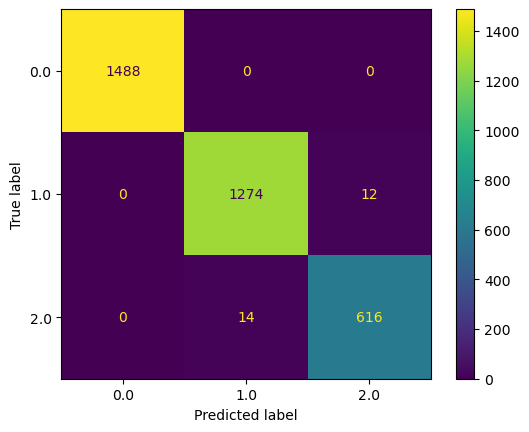

In [41]:
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

In the end, we are going to address the class-imbalance issue, as we saw that the class distribution of our target variable is slightly imbalanced. We will do that by assigning class weights to the data samples, and then build a weighted random forest model. 

In [42]:
# class weight
class_weight = compute_class_weight(class_weight = 'balanced', classes = np.unique(y), y = y).tolist()
class_weight = {i : class_weight[i] for i in range(len(class_weight))}
class_weight

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

In [43]:
rf = RandomForestClassifier(class_weight = class_weight, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average = "weighted")}')
print(classification_report(y_test, y_pred))

accuracy: 0.9923619271445359
f1 score: 0.9923525426132418
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



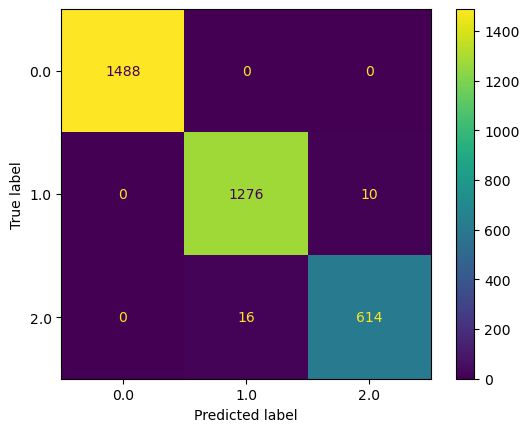

In [44]:
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

As we can see, both  accuracy and f1 score remained practically the same, which means that the classes were not so imbalanced after all.

## Conclusion

If we compare the f1 score for these three models, we can draw the conclusion that the random forest algorithm (weighted or not) performs better for the given dataset.